<a href="https://colab.research.google.com/github/lakxhit/campus-placement-predictor-ml/blob/main/campusplace_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Campus placements: Finding if you get placed by your cgpa and IQ

## 1)Pre-processing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


In [ ]:
df = pd.read_csv('/content/placement.csv')

## Printing head of the CSV

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


## We can see an extra column"Unnamed" is there so we remove it:-

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


## 2)EDA (exploring data science)

##Scatterplot

In [ ]:
import matplotlib.pyplot as plt


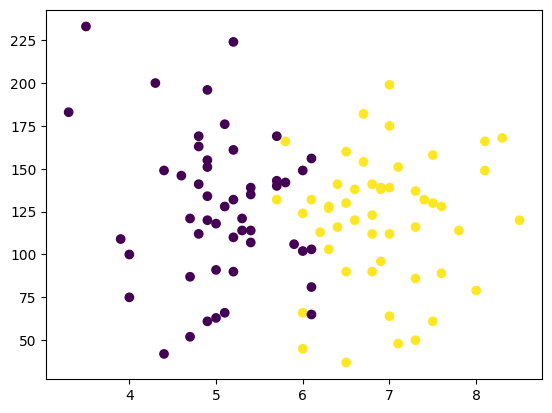

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

## 3) Extracting output columns

In [ ]:
x = df.iloc[:,0:2]

In [ ]:
y = df.iloc[:,-1]

In [ ]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


## 4) Split data into Train and Test  

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


In [ ]:
x_train

,cgpa,iq
87,5.7,132.0
51,4.8,141.0
93,6.8,112.0
17,3.3,183.0
45,6.0,66.0
...,...,...
65,8.1,166.0
32,7.0,139.0
84,5.7,169.0
88,4.4,149.0


In [ ]:
y_train

,placement
18,0
30,1
73,0
33,0
90,1
...,...
60,1
71,1
14,0
92,0


In [ ]:
X_test

,cgpa,iq
12,5.4,139.0
68,4.0,75.0
49,5.4,135.0
56,6.1,65.0
85,5.8,166.0
83,7.5,130.0
72,7.3,116.0
69,8.5,120.0
1,5.9,106.0
80,4.9,196.0


In [ ]:
from sklearn.preprocessing import StandardScaler

## Scale the data

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

array([[-1.73718527, -0.62029848],
       [ 1.45537303,  0.09806189],
       [-0.9390457 , -1.62087186],
       [ 0.03645823,  0.63683217],
       [ 1.1893265 , -0.97947867],
       [-0.14090612,  0.45724208],
       [-0.9390457 ,  0.79076654],
       [ 1.1893265 , -1.90308486],
       [-0.49563482,  0.3802749 ],
       [-1.82586745, -0.38939693],
       [ 1.63273738, -0.26111829],
       [-1.38245657,  0.63683217],
       [ 0.92327998,  1.91961855],
       [ 1.45537303, -0.90251149],
       [ 2.2535126 , -0.10718393],
       [-0.76168135,  1.32953682],
       [-0.9390457 ,  0.25199626],
       [-1.38245657, -2.10833068],
       [-0.76168135, -1.49259322],
       [ 1.1893265 , -0.20980684],
       [ 0.8345978 ,  0.35461917],
       [-0.67299917,  0.9447009 ],
       [-0.14090612,  1.07297954],
       [-0.67299917, -0.87685576],
       [ 0.74591563, -0.31242975],
       [ 1.01196215, -1.95439632],
       [ 0.8345978 , -0.72292139],
       [ 1.8987839 ,  1.07297954],
       [ 0.74591563,

In [ ]:
x_test = scaler.transform(X_test)

In [ ]:
x_test

array([[-0.49563482,  0.3802749 ],
       [-1.73718527, -1.26169167],
       [-0.49563482,  0.27765199],
       [ 0.1251404 , -1.51824895],
       [-0.14090612,  1.07297954],
       [ 1.36669085,  0.14937335],
       [ 1.1893265 , -0.20980684],
       [ 2.2535126 , -0.10718393],
       [-0.05222395, -0.46636412],
       [-0.9390457 ,  1.84265137]])

##5) Train the model

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()


In [ ]:
clf.fit(x_train, y_train)

LogisticRegression()

##6) Evaluating the model

In [ ]:
y_pred =clf.predict(x_test)

In [ ]:
y_test

,placement
83,1
53,1
70,1
45,1
44,1
39,0
22,0
80,0
10,1
0,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred) ## we see this model is not accurate

0.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

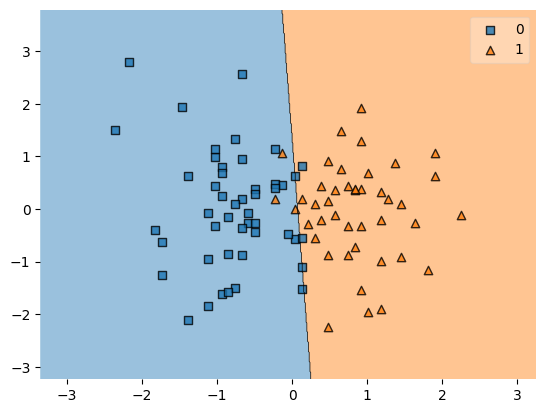

In [ ]:
plot_decision_regions(x_train,y_train.values,clf=clf)

##7)Exporting the model

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))

## Completed